In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2025-02-14 11:45:20--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.172, 18.64.229.135, 18.64.229.91, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089.8’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.06s   

2025-02-14 11:45:20 (11.1 MB/s) - ‘bike_sharing.csv?1642089089.8’ saved [648353/648353]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_1samp, ttest_ind, ttest_rel, chi2, chi2_contingency, shapiro, levene, f_oneway, kruskal

In [ ]:
data = pd.read_csv('bike_sharing.csv?1642089089')

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#checking the shape of the dataframe
data.shape
print(f'shape of the dataframe:{data.shape}')
print(f'No of rows: {data.shape[0]}')


shape of the dataframe:(10886, 12)
No of rows: 10886


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
data['Year'] = data['datetime'].dt.year

In [ ]:
data['month'] = data['datetime'].dt.month_name()

In [ ]:
data['day'] = data['datetime'].dt.day

In [ ]:
data['day_name'] = data['datetime'].dt.day_name()

In [ ]:
data['hour'] = data['datetime'].dt.hour

In [ ]:
temp_points = [0,10,20,30,41]
temp_labels = ['0-10','10-20','20-30','30-41']

In [ ]:
data['temp_group'] = pd.cut(data['temp'], bins=temp_points, labels=temp_labels)

In [ ]:
data['weather'] = data['weather'].astype('str')

In [ ]:
data.loc[data['weather'] == '1','weather'] = 'clear'
data.loc[data['weather'] == '2','weather'] = 'cloudy'
data.loc[data['weather'] == '3','weather'] = 'light_rain'
data.loc[data['weather'] == '4','weather'] = 'heavy_rain'

In [ ]:
data['weather'].value_counts()

,count
weather,
clear,7192
cloudy,2834
light_rain,859
heavy_rain,1


In [ ]:
data = data.loc[data['weather'] != 'heavy_rain']

In [ ]:
data['season'] = data['season'].astype('str')

<ipython-input-313-75b39bd54887>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'] = data['season'].astype('str')


In [ ]:
data.loc[data['season'] == '1','season'] = 'spring'
data.loc[data['season'] == '2','season'] = 'summer'
data.loc[data['season'] == '3','season'] = 'fall'
data.loc[data['season'] == '4','season'] = 'winter'

In [ ]:
# checking for the null values
data.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
def distinct_values(df,col):
  print(f'{col} :-')
  print(f'unique values: {df[col].unique()}')
  print('Value counts:-')
  print(f'{df[col].value_counts()}')

In [ ]:
col_list = ['season','holiday','workingday','weather','temp_group']

In [ ]:
for i in col_list:
  distinct_values(data,i)
  print('\n')

season :-
unique values: ['spring' 'summer' 'fall' 'winter']
Value counts:-
season
winter    2734
summer    2733
fall      2733
spring    2685
Name: count, dtype: int64


holiday :-
unique values: [0 1]
Value counts:-
holiday
0    10574
1      311
Name: count, dtype: int64


workingday :-
unique values: [0 1]
Value counts:-
workingday
1    7411
0    3474
Name: count, dtype: int64


weather :-
unique values: ['clear' 'cloudy' 'light_rain']
Value counts:-
weather
clear         7192
cloudy        2834
light_rain     859
Name: count, dtype: int64


temp_group :-
unique values: ['0-10', '10-20', '20-30', '30-41']
Categories (4, object): ['0-10' < '10-20' < '20-30' < '30-41']
Value counts:-
temp_group
20-30    4334
10-20    4049
0-10     1258
30-41    1244
Name: count, dtype: int64




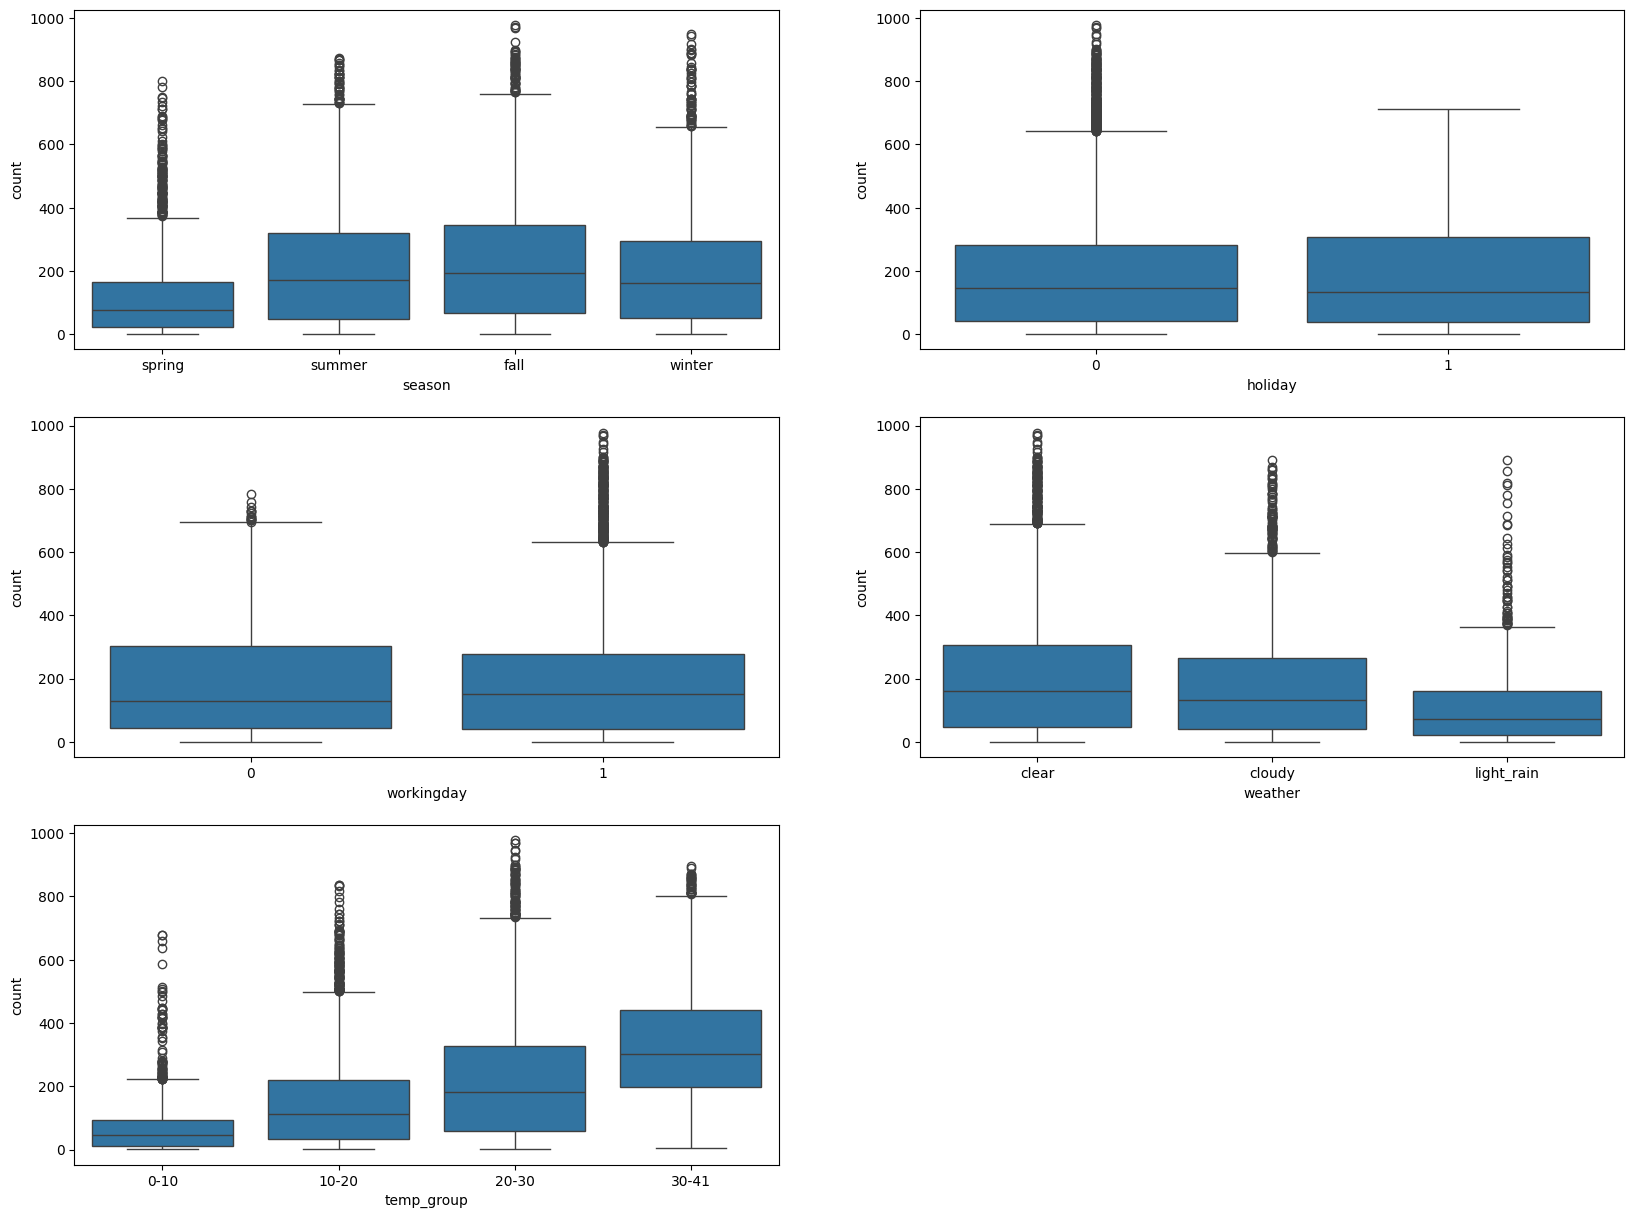

In [ ]:
# checking for outliers
plt.figure(figsize=(20,15))
for i in range(1, len(col_list)+1):
  plt.subplot(3,2,i)
  sns.boxplot(x = data[col_list[i-1]], y = data['count'])
plt.show()



*   In the course of analyzing our categorical variables (season,holiday,workingday,weather), we identified several outliers. Upon closer examination, these outliers are not anomalies to be dismissed but rather key data points that provide valuable insights.

*   We can consider these outliers are good outliers as they are good for improving the revenue


*   Good outliers should be carefully evaluated and incorporated into our analysis.

*   They provide a fuller, more nuanced understanding of the data, offering pathways for innovation and strategic improvements.








In [ ]:
data.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
data.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
clear,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
cloudy,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
light_rain,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


In [ ]:
data.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7411.0,193.015787,184.525801,1.0,41.0,151.0,277.0,977.0


In [ ]:
data.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10574.0,191.744278,181.521514,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


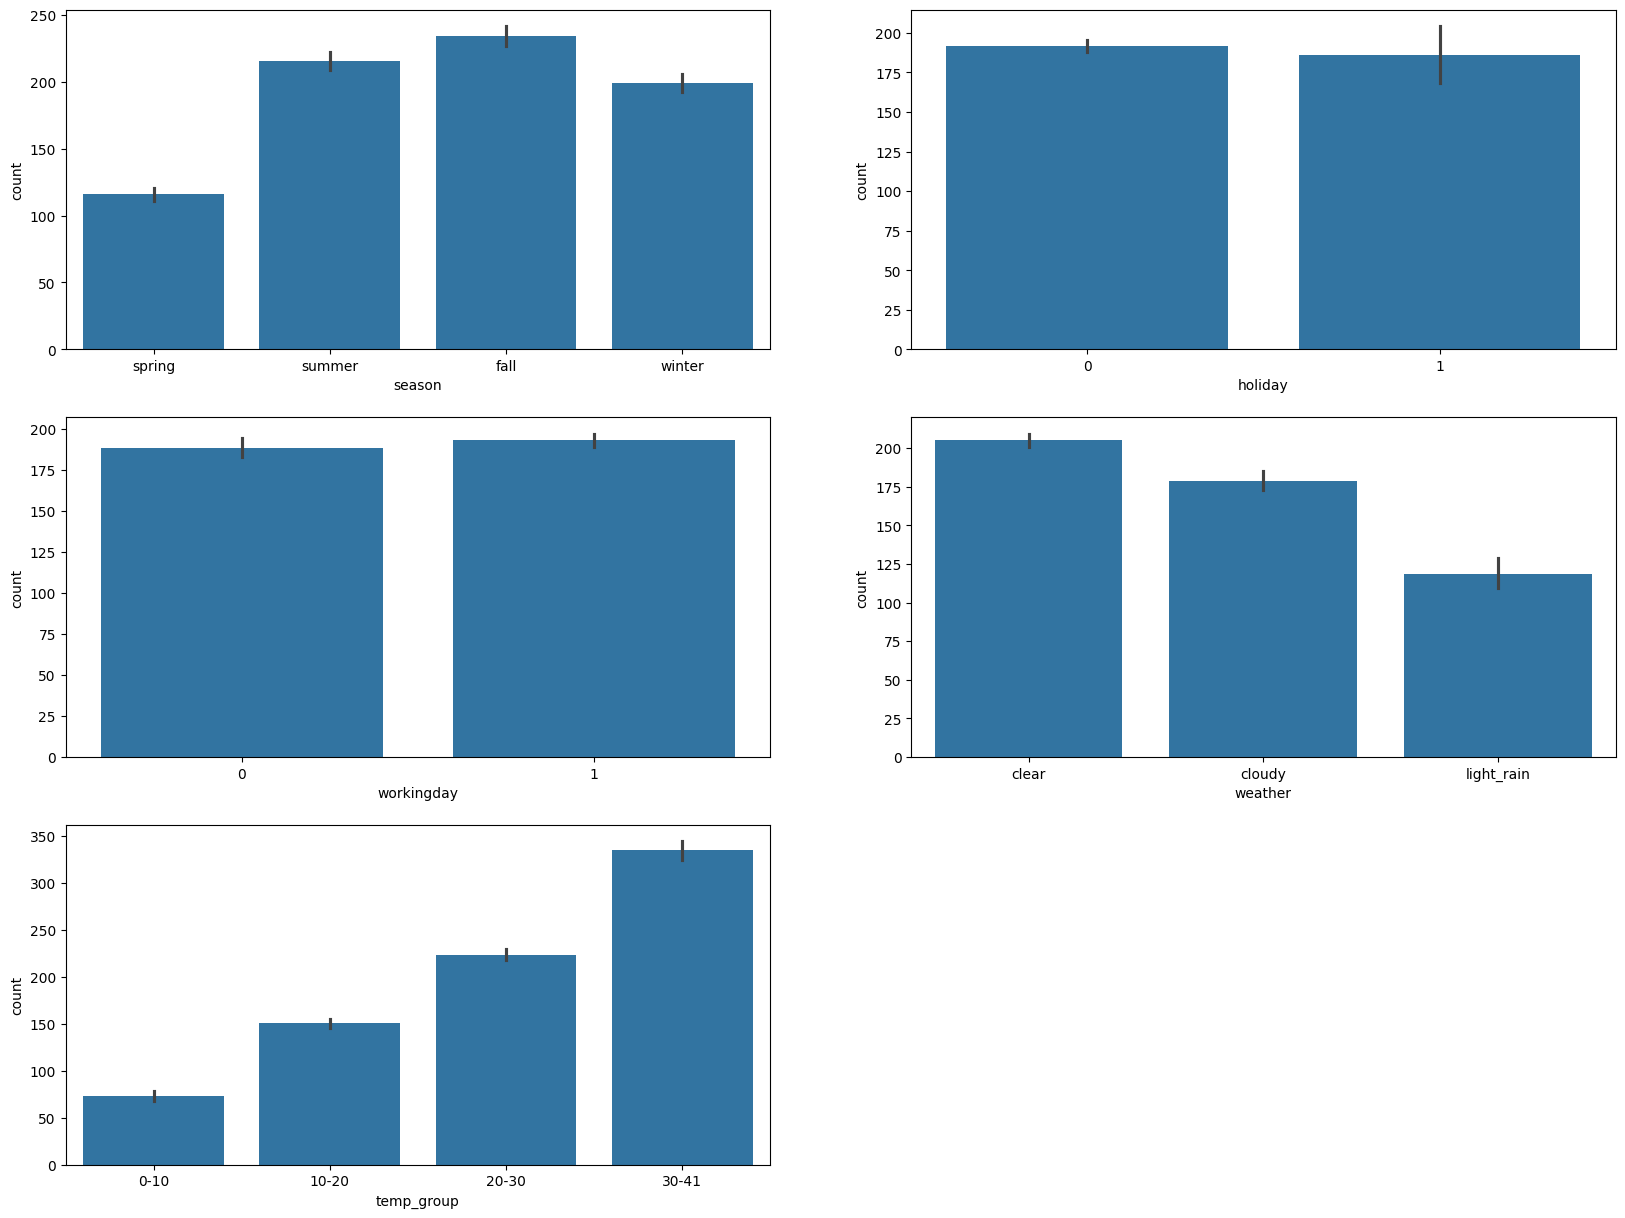

In [ ]:
plt.figure(figsize=(20,15))
for i in range(1, len(col_list)+1):
  plt.subplot(3,2,i)
  sns.barplot(x = data[col_list[i-1]], y = data['count'], estimator = np.mean)
plt.show()

BIVARIENT ANALYSIS :

we have plotted the categorical variable (season, holiday, workingday, weather) against a continious variable count

Observations from the above visualizations:

*   There is significant difference in the mean of the count variable across various seasons (1, 2, 3, 4)

*   The mean difference across the holiday variables and working day variables are not so significant

*   There is a significant difference in the mean of the count variable across various weathers (1, 2, 3, 4)


We need to perform the hyponthesis testing across the above categorical variables to prove that the above observations are valid


In [ ]:
data_workingday = data.loc[data['workingday'] == 1]

In [ ]:
data_non_workingday = data.loc[data['workingday'] == 0]

# Question 1 : Is there any significant difference between the no of bike rides on weekdays and weekends ?

Step 1 : Define the null and alternate hyponthesis

H(o) : The demand of bikes on weekdays is greater than or similar to the demand of bikes on weekend

H(a) : The demand of bikes on weekdays is less than the demand of bikes on weekeend

Let mean_1 and mean_2 be the average no of bikes rented on weekdays and weekends respectively

Mathematically the above hyponthesis can be writtens as:

H(o) : mean_1 >= mean_2
H(a) : mean_1 < mean_2

In [ ]:
# Taking a sample of 100 working days 100 times
data_workingday_sample = [data_workingday['count'].sample(n=100, replace=True).mean() for i in range(100)]

In [ ]:
# Taking a sample of 100 non working days 100 times
data_non_workingday_sample = [data_non_workingday['count'].sample(n=100, replace=True).mean() for i in range(100)]

Step 2: Select an appropriate test



*   We will be performing the ttest for the above two samples as we are performing the hyponthesis on a categorical variables of 2 groups over a continious count variable

*  A t-test looks at two sets of data that are different from each other, with no standard deviation or variance

*   We are not performing the Z test for the above two samples as we do not know the standard deviation of the population

*  As the n (sample size) is large, t test is just close to z test and one doen't lose anything to continue to use t test.

*   We take equal sample size for both the samples because the unequal sample sizes can lead to unequal variances between samples, which affects the assumption of equal variances in tests like t-test, ANOVA, etc

*   Having both unequal sample sizes and variances dramatically affects the statistical power of a test.


*   This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem








Step 3: Decide the significance level

As given in the problem statement, we select alpha  = 0.05

In [ ]:
#assigning the significance level
alpha = 0.05

Step 4: Calculate the P value

In [ ]:
def result(p_value,alpha):
  if p_value < alpha :
    print(f'As the p_value {p_value} is less than the significance level, we reject the null hypothesis')
  else:
    print(f'As the p_value {p_value} is greater than the significance level, we fail to reject the null hypothesis')

In [ ]:
ttest_stat, p_value = ttest_ind(data_workingday_sample, data_non_workingday_sample, equal_var= False, alternative='less')
print(f'p_value: {p_value}')
result(p_value,alpha)

p_value: 0.9963332679143229
As the p_value 0.9963332679143229 is greater than the significance level, we fail to reject the null hypothesis


Observations : Since the p_value is greater than the significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no of bike rides during weekdays is greater than or equal to those on weekends

# Question 2: Is there any significant difference between the no of bike rides on regular days or holidays

Step 1: Define the null and alternate hyponthesis

H(o) : The demand of bikes on regular days  is greater than or similar to the demand of bikes on holidays

H(a) : The demand of bikes on regular days is less than the demand of bikes on holidays

Let mean_1 and mean_2 be the average no of bikes rented on weekdays and weekends respectively

Mathematically the above hyponthesis can be writtens as:

H(o) : mean_1 >= mean_2 H(a) : mean_1 < mean_2

In [ ]:
regular_days = [data.loc[data['holiday'] == 0,'count'].sample(n=100,replace = True).mean() for i in range(100)]
holidays = [data.loc[data['holiday'] == 1,'count'].sample(n=100,replace = True).mean() for i in range(100)]

Step 2: Select an appropriate test

*   We will be performing the ttest for the above two samples as we are performing the hyponthesis on a categorical variables of 2 groups over a continious count variable
*   We are not performing the Z test for the above two samples as we do not know the standard deviation of the population

*   This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem






Step 3 : Define the significance level
As given in the problem statement, the significance level is 0.05

In [ ]:
alpha = 0.05

Step 4: Calculate the p_value

In [ ]:
ttest_stat, p_value = ttest_ind(regular_days, holidays, equal_var= False, alternative='less')
print(f'p_value: {p_value}')
result(p_value,alpha)


p_value: 0.9996552326915206
As the p_value 0.9996552326915206 is greater than the significance level, we fail to reject the null hypothesis


Observations : Since the p_value is greater than 5 % significance level, we fail to reject the null hypothesis. Hence we have enough statistical evidence to say that the average no of bike rides during the regular days is greater than or equal to those on holidays

# Question 3: Is the demand of bicycles on rent same for different weather conditions?

Step 1: Define null and alternate hypothesis

H(o): The average no of rides in different weather conditions are equal

H(a): The average no of rides in different weather conditions are not equal



In [ ]:
data_clear = data.loc[data['weather'] == 'clear','count'].sample(750)
data_cloudy = data.loc[data['weather'] == 'cloudy','count'].sample(750)
data_light_rain = data.loc[data['weather'] == 'light_rain','count'].sample(750)

Step 2: Select an appropriate test

The above hypothesis consists of three independent population means. One way ANOVA could be the appropriate test

The ANOVA test has important assumptions that must be satisfied in order for the asscociated p_value to be valid



*   The samples are independent
*   Each sample if from a normally distributed population
*   The population variance of the groups are equal

If the samples satisfy all the above assumptions we will be performing the one way ANOVA test






We will perform the shapiro wilk's test to check the whether the samples are normal or not

Shapiro-wilik's test:

H(o) : Sample follows the normal distribution

H(a) : Sample doesnot follow normal distribution

In [ ]:
weather_list = [data_clear,data_cloudy,data_light_rain]
weather_list_name = ['clear','cloudy','light_rain']
for i in range(len(weather_list)):
  print(f'{weather_list_name[i]}:-')
  stat, p_value = shapiro(weather_list[i])
  print(f'p_value: {p_value}')
  result(p_value,alpha)
  print('\n')

clear:-
p_value: 2.803960834842067e-23
As the p_value 2.803960834842067e-23 is less than the significance level, we reject the null hypothesis


cloudy:-
p_value: 1.421981768017937e-22
As the p_value 1.421981768017937e-22 is less than the significance level, we reject the null hypothesis


light_rain:-
p_value: 2.788446908592604e-31
As the p_value 2.788446908592604e-31 is less than the significance level, we reject the null hypothesis




Levene's test:

Null hyponthesis (H(o)) : All the samples variances are equal

Alternate hypothesis(H(a)) : All the samples variances are not equal

In [ ]:
stat, p_value = levene(data_clear,data_cloudy,data_light_rain)
print(f'p_value: {p_value}')
result(p_value,alpha)

p_value: 2.110209016656493e-15
As the p_value 2.110209016656493e-15 is less than the significance level, we reject the null hypothesis


As we can see from the above shapiro and levene's test that the samples do not satisfy the assumptions for one way ANOVA. Hence we will be performing the Kruskal-wallis test for the above samples



*   The distribution of the samples can be of any shape to perform kruskal test
*   We can perform the kruskal test even if variance of the samples are not equal




Step 3 : Define the siginificance level

Step 4: Calculate the p_value

In [ ]:
# calculating the p_value through kruskal
stat, p_value = kruskal(data_clear,data_cloudy,data_light_rain)
print(f'p_value: {p_value}')
result(p_value,alpha)

p_value: 1.6472671701186557e-21
As the p_value 1.6472671701186557e-21 is less than the significance level, we reject the null hypothesis


In [ ]:
# calculating the p_value through one way ANOVA
stat, p_value = f_oneway(data_clear,data_cloudy,data_light_rain)
print(f'p_value: {p_value}')
result(p_value,alpha)

p_value: 1.3437172441918872e-20
As the p_value 1.3437172441918872e-20 is less than the significance level, we reject the null hypothesis


Observations :

Since the p_value is less than 5 % significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no of bike rides in different weather conditions are not equal

In both the kruskal and one way ANOVA tests the p values came to be less than the alpha

In [ ]:
season_weather_table = pd.crosstab(data['season'], data['weather'])

In [ ]:
chi2_contingency(season_weather_table)

Chi2ContingencyResult(statistic=46.10145731073249, pvalue=2.8260014509929343e-08, dof=6, expected_freq=array([[1805.76352779,  711.55920992,  215.67726229],
       [1774.04869086,  699.06201194,  211.8892972 ],
       [1805.76352779,  711.55920992,  215.67726229],
       [1806.42425356,  711.81956821,  215.75617823]]))